# **Import the libraries**

In [1]:
import numpy as np  # For array manipulation
import pandas as pd # For easily viewing and manipulating dataframes


# **Import the dataset**

In [2]:
data = pd.read_csv('winequality-red.csv', sep = ';' )

# **Display the dataset information**

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **Exploratory Data Analysis**

In [4]:
target = data.quality # The targets column
X = data.drop('quality', axis=1) # features

print('\nOur data has %d observations and %d features\n' %(X.shape[0], X.shape[1]))

#columns with missing data
print('Are there missing observations the columns?\n', (data.isnull().any()))

print('\nThere are', target.nunique(), 'Unique values for quality, namely:', sorted(target.unique()))


Our data has 1599 observations and 11 features

Are there missing observations the columns?
 fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

There are 6 Unique values for quality, namely: [3, 4, 5, 6, 7, 8]


In [5]:
vgq = data[target>6]  #top tier quality
aq = data[(target>=5) & (target<=6)]  #average quality
bq = data[target<5]   #bad quality

print('%.2f %% of the wines are of top tier quality' %(100*len(vgq)/len(target)))
print('%.2f %% of the wines are of average quality' %(100*len(aq)/len(target)))
print('%.2f %% of the wines are below average quality' %(100*len(bq)/len(target)))

13.57 % of the wines are of top tier quality
82.49 % of the wines are of average quality
3.94 % of the wines are below average quality


<ipython-input-6-1bd428a33bf2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, norm_hist=False, kde=False)


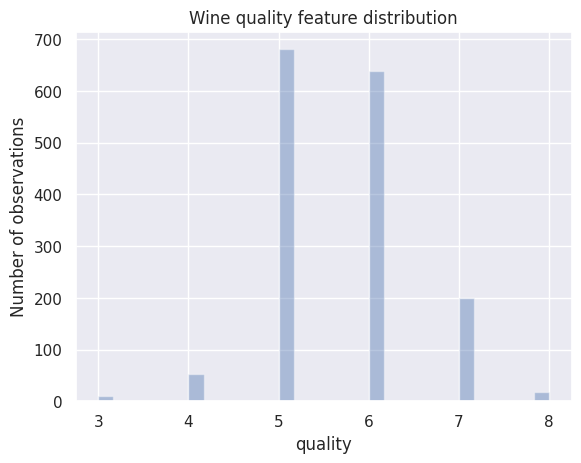

In [6]:
import matplotlib.pyplot as plt # The go-to library for plotting in python
import seaborn as sns
sns.set() #initialise seaborn so that all our plots are exciting by default


sns.distplot(target, norm_hist=False, kde=False)
plt.title('Wine quality feature distribution')
plt.ylabel('Number of observations')
plt.show()

In [7]:
XX = X.copy() # To be safe, let's only modify a copy of the features DF

XX['best_quality'] = 1
XX['best_quality'][target<7] = 0 # All wines less than excellent

XX.describe()

<ipython-input-7-cf022749f94d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XX['best_quality'][target<7] = 0 # All wines less than excellent


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


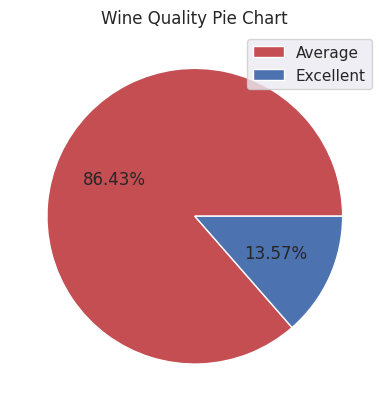

In [8]:
plt.pie(XX.best_quality.value_counts(), autopct='%1.2f%%', colors=['r', 'b'])
plt.legend(labels=['Average', 'Excellent'], loc='best')
plt.title('Wine Quality Pie Chart')
plt.show()

In [9]:
# The targets are now composed of 2 classes (excellent and not excellent)
y = XX.best_quality
# Let's drop the targets column from the features dataframe
XX = XX.drop(['best_quality'], axis=1)

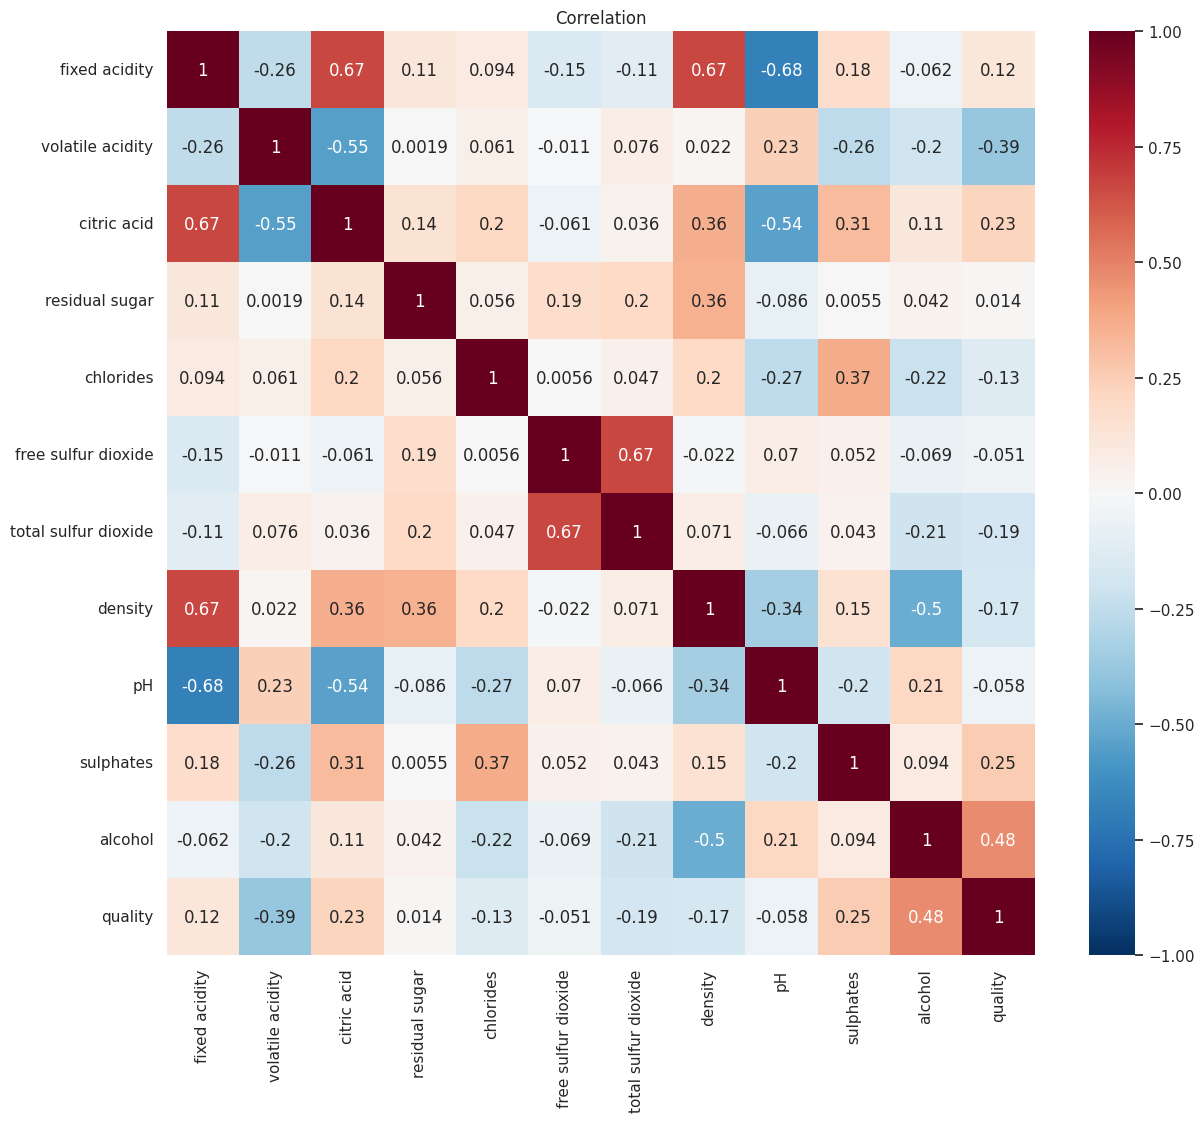

In [10]:
correlation = data.corr()
plt.figure(figsize=(14,12))
plt.title('Correlation')
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25,
                                                   random_state=0, stratify=y)

In [12]:
cat = [cname for cname in XX.columns if XX[cname].dtype=='object']
print('There are %d columns with categorical entries\n' %len(cat))

There are 0 columns with categorical entries



In [13]:
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
print('Defining the Classifiers and fitting them on our training data...')

decTree_pipeline = Pipeline(steps=[('preprocessor', preprocessing.StandardScaler()),
                                   ('model', DecisionTreeClassifier(random_state=0))])
decTree_pipeline.fit(X_train, y_train)

RF = Pipeline(steps=[('preprocessor', preprocessing.StandardScaler()),
                     ('model', RandomForestClassifier(n_estimators=1000, random_state=0))])
RF.fit(X_train, y_train)


xgb = Pipeline(steps=[('preprocessor', preprocessing.StandardScaler()),
              ('model', xgboost.XGBClassifier(n_estimators=1000, learning_rate=0.05))])
xgb.fit(X_train, y_train)

print('...\nDone!')

Defining the Classifiers and fitting them on our training data...
...
Done!


In [14]:
tree_pred = decTree_pipeline.predict(X_test) #decision tree
rf_pred = RF.predict(X_test) #random forest
xgb_pred = xgb.predict(X_test) #xtreme gradient Boosting

In [15]:
from sklearn.metrics import accuracy_score

print ('Accuracy: Decision Tree = %s%%' %(100*accuracy_score(y_test, tree_pred)))
print ('Accuracy: Random Forest = %s%%' %(100*accuracy_score(y_test, rf_pred)))
print ('Accuracy: xg boost = %s%%' %(100*accuracy_score(y_test, xgb_pred)))

Accuracy: Decision Tree = 89.25%
Accuracy: Random Forest = 90.25%
Accuracy: xg boost = 91.25%


In [16]:
print('A model that always predicts insipid wine quality would be\
 accurate\n %.2f%% of the time' %(100*(1-y_test.mean())))

A model that always predicts insipid wine quality would be accurate
 86.50% of the time


In [24]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix for simple, gradient boosted, and random forest tree classifiers:')
print('Simple Tree:\n',confusion_matrix(y_test,tree_pred),'\n')
print('Random Forest:\n',confusion_matrix(y_test,rf_pred),'\n')
print('Gradient Boosted:\n',confusion_matrix(y_test, xgb_pred))

Confusion Matrix for simple, gradient boosted, and random forest tree classifiers:
Simple Tree:
 [[324  22]
 [ 21  33]] 

Random Forest:
 [[331  15]
 [ 24  30]] 

Gradient Boosted:
 [[327  19]
 [ 16  38]]


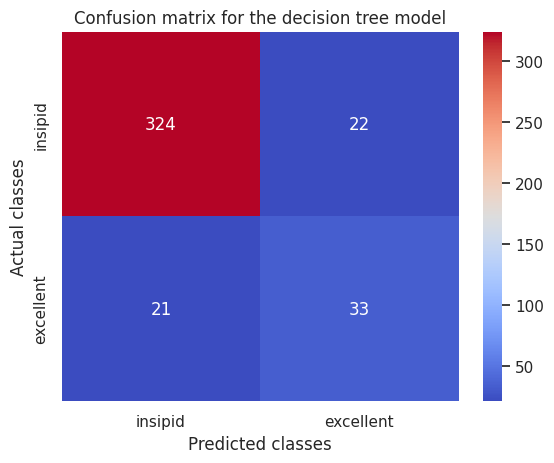

In [18]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, fmt='d', cmap='coolwarm')
ax.set_xlabel('Predicted classes')
ax.set_ylabel('Actual classes')
ax.xaxis.set_ticklabels(['insipid', 'excellent'])
ax.yaxis.set_ticklabels(['insipid', 'excellent'])
plt.title('Confusion matrix for the decision tree model')
plt.show()

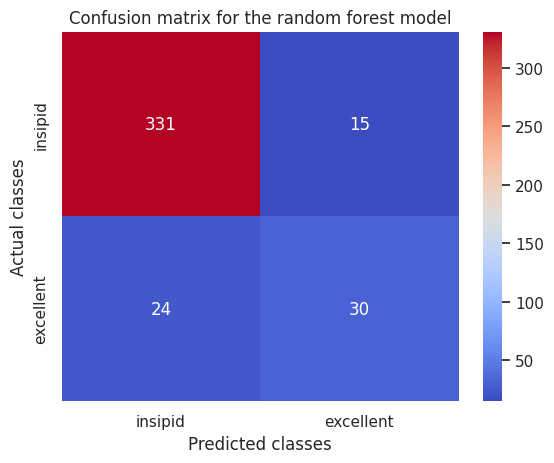

In [25]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='coolwarm')
ax.set_xlabel('Predicted classes')
ax.set_ylabel('Actual classes')
ax.xaxis.set_ticklabels(['insipid', 'excellent'])
ax.yaxis.set_ticklabels(['insipid', 'excellent'])
plt.title('Confusion matrix for the random forest model')
plt.show()

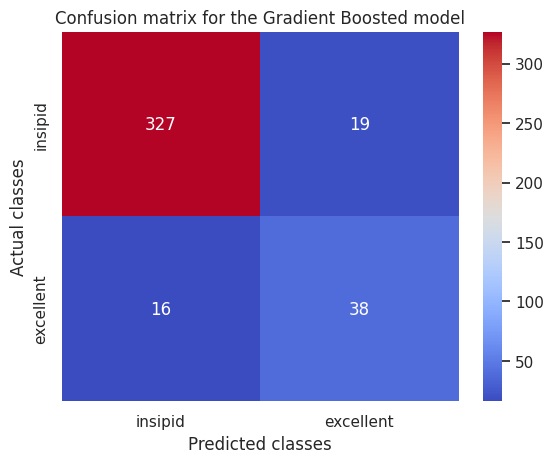

In [26]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='coolwarm')
ax.set_xlabel('Predicted classes')
ax.set_ylabel('Actual classes')
ax.xaxis.set_ticklabels(['insipid', 'excellent'])
ax.yaxis.set_ticklabels(['insipid', 'excellent'])
plt.title('Confusion matrix for the Gradient Boosted model')
plt.show()

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       346
           1       0.60      0.61      0.61        54

    accuracy                           0.89       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.89      0.89      0.89       400



In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       346
           1       0.67      0.56      0.61        54

    accuracy                           0.90       400
   macro avg       0.80      0.76      0.78       400
weighted avg       0.90      0.90      0.90       400



In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       346
           1       0.67      0.70      0.68        54

    accuracy                           0.91       400
   macro avg       0.81      0.82      0.82       400
weighted avg       0.91      0.91      0.91       400



In [30]:
tree_pred_prob = decTree_pipeline.predict_proba(X_test)[:,1]
rf_pred_prob = RF.predict_proba(X_test)[:,1]
xgb_pred_prob = xgb.predict_proba(X_test)[:,1]

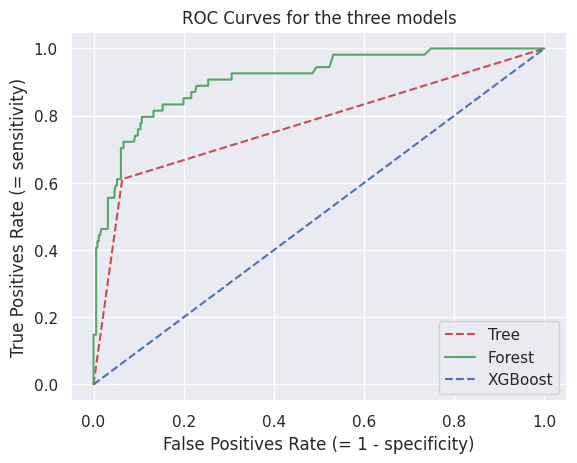

In [31]:
from sklearn.metrics import precision_recall_curve, roc_curve

fp_tree, tp_tree, thresh_tree = roc_curve(y_test, tree_pred_prob)
fp_rf, tp_rf, thresh_rf = roc_curve(y_test, rf_pred_prob)
fp_xgb, tp_xgb, thresh_xgb = roc_curve(y_test, xgb_pred_prob)

plt.plot(fp_tree, tp_tree, 'r--', label='Tree')
plt.plot(fp_rf, tp_rf, 'g-', label='Forest')
plt.plot(fp_xgb, fp_xgb, 'b--', label='XGBoost')
plt.title('ROC Curves for the three models')
plt.xlabel('False Positives Rate (= 1 - specificity)')
plt.ylabel('True Positives Rate (= sensitivity)')
plt.legend(loc='best')
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

# Your other code remains unchanged
print('Decision Tree AUC:\t %.2f%%' % (100 * roc_auc_score(y_test, tree_pred_prob)))
print('Random Forest AUC:\t %.2f%%' % (100 * roc_auc_score(y_test, rf_pred_prob)))

print('Decision Tree AUC:\t %.2f%%' %(100*roc_auc_score(y_test, tree_pred_prob)))

print('Random Forest AUC:\t %.2f%%'  %(100*roc_auc_score(y_test, rf_pred_prob)))

print('XGBoosting AUC: \t %.2f' %(100*roc_auc_score(y_test, xgb_pred_prob)))

Decision Tree AUC:	 77.38%
Random Forest AUC:	 90.80%
Decision Tree AUC:	 77.38%
Random Forest AUC:	 90.80%
XGBoosting AUC: 	 90.14


# **We have a clear winner, the Random Forest Classifier!**

# **TPOT**

In [39]:
!pip install tpot
from tpot import TPOTClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=a47e0ecb1100ccc2672a908afa88cebe5cd9bfc9ae6ec9eab28182e3052263e0
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [40]:
tpot =  TPOTClassifier(generations=10, population_size=20, verbosity=3, n_jobs=-1)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]

_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.

Generation 1 - Current Pareto front scores:

-1	0.8974058577405858	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=True, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.9000000000000001, ExtraTreesClassifier__min_samples_leaf=2, ExtraTreesClassifier__min_samples_split=14, ExtraTreesClassifier__n_estimators=100)

-2	0.9024058577405858	GradientBoostingClassifier(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=5, GradientBoostingClassifier__max_features=0.4, GradientBoostingClassifier__min_samples_leaf=1, GradientBoostingClassifier__min_samples_split=12, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=1.0), GradientBoostingClassifier__learning_rate=1.0, Gradie

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [41]:
tpot.export('tpot_wine_pipeline.py')
!cat tpot_wine_pipeline.py #display the final pipeline

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.902423291492329
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.5, max_depth=5, max_features=0.4, min_samples_leaf=1, min_samples_split=12, n_estimators=100, subsample=1.0)),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=8, max_features=0.8, min_samples_leaf=8, min_s

In [42]:
tpot_preds = tpot.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
